In [1]:
# Select start and end date
start_date = '2023-07-20 10:20:00'
end_date = '2023-07-20 11:30:00'

# # 1m/s, rectangle 1
# start_date = '2023-07-20 10:29:00'
# end_date = '2023-07-20 10:35:00'
# start_date = '2023-07-20 10:30:10'
# end_date = '2023-07-20 10:33:20'

# # 1m/s, rectangle 2
# start_date = '2023-07-20 10:38:00'
# end_date = '2023-07-20 10:43:30'
# start_date = '2023-07-20 10:38:50'
# end_date = '2023-07-20 10:42:00'

# # 5m/s, rectangle
# start_date = '2023-07-20 10:50:00'
# end_date = '2023-07-20 10:53:00'
# start_date = '2023-07-20 10:50:45'
# end_date = '2023-07-20 10:51:50'

# # 1m/s, 8
# start_date = '2023-07-20 10:57:00'
# end_date = '2023-07-20 11:03:30'
# start_date = '2023-07-20 10:58:00'
# end_date = '2023-07-20 11:01:50'

# # 5m/s, 8
# start_date = '2023-07-20 11:04:00'
# end_date = '2023-07-20 11:10:00'
# start_date = '2023-07-20 11:05:00'
# end_date = '2023-07-20 11:06:10'

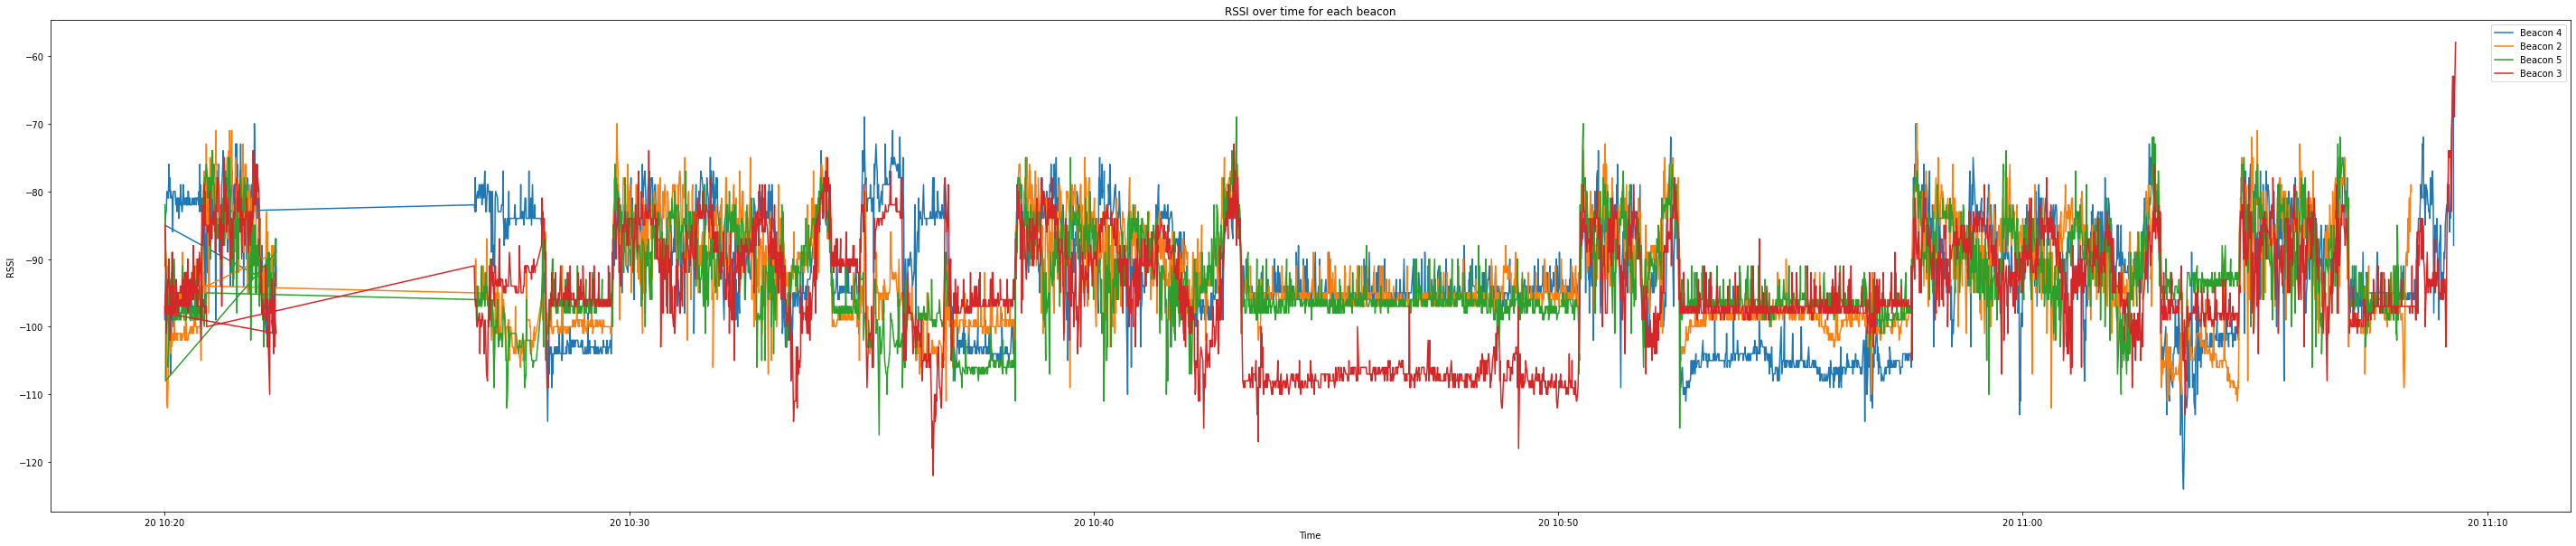

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('data_0720/lora_module_received.csv', skipinitialspace=True)

# Filter the DataFrame
data = data[data['packet_text'].isin(['2', '3', '4', '5'])]

# Convert the received_time to datetime format
data['received_time'] = pd.to_datetime(data['received_time'], unit='ns')

# Localize the timestamp to GMT first (assuming the original time is in GMT)
data['received_time'] = data['received_time'].dt.tz_localize('GMT')

# Convert to Rome time
data['received_time'] = data['received_time'].dt.tz_convert('Europe/Rome')

# Filter data based on the date range
mask = (data['received_time'] > start_date) & (data['received_time'] <= end_date)
data = data.loc[mask]

plt.figure(figsize=(50,10),facecolor="white")

# Plot the RSSI for each beacon over time
for beacon in data['packet_text'].unique():
    beacon_data = data[data['packet_text'] == beacon]
    plt.plot(beacon_data['received_time'], beacon_data['rssi'], label=f'Beacon {beacon}')


plt.xlabel('Time')
plt.ylabel('RSSI')
plt.title('RSSI over time for each beacon')
plt.legend()
plt.show()
